# Stellar library example

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pymiles.stellar_library import stellar_library as stl

## Initializing instance

In [2]:
lib = stl(source="MILES_STARS", version="9.1")

## Get starname by ID

In [3]:
starname = lib.get_starname(id=100)
print(starname)

['HD017382']



## Searching by ID

['HD017382'] 3500.0 7429.4


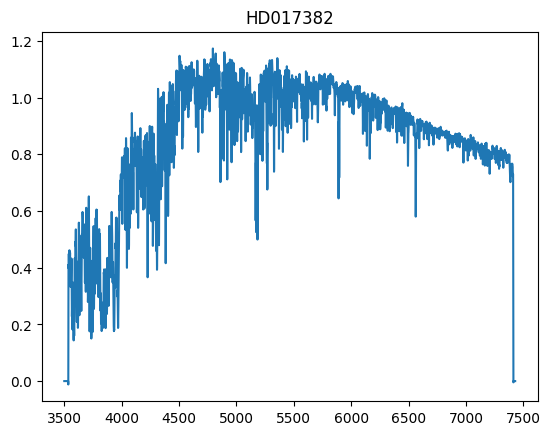

In [4]:
tmp = lib.search_by_id(id=100)
print(tmp.starname, tmp.wave_init, tmp.wave_last)
plt.plot(tmp.wave, tmp.spec)
plt.title(tmp.starname[0])
plt.show()

## Get stars within parameter range

In [5]:
tmp = lib.get_stars_in_range(
    teff_lims=[4500.0, 5000.0], logg_lims=[2.0, 2.5], FeH_lims=[0.0, 0.2]
)
print("Teff", np.nanmin(tmp.teff), np.nanmax(tmp.teff))
print("Log(g)", np.nanmin(tmp.logg), np.nanmax(tmp.logg))
print("[Fe/H]", np.nanmin(tmp.FeH), np.nanmax(tmp.FeH))

Teff 4514.0 4965.0
Log(g) 2.09 2.49
[Fe/H] 0.0 0.19


## Search by params (Gets the closest spectra to those params)

743 5041.0 3.04 -0.04 nan


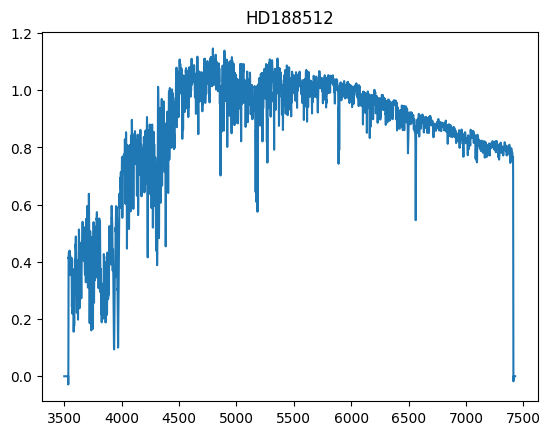

In [6]:
tmp = lib.search_by_params(teff=5000.0, logg=3.0, FeH=0.0, MgFe=0.0)
print(tmp.id, tmp.teff, tmp.logg, tmp.FeH, tmp.MgFe)
plt.plot(tmp.wave, tmp.spec)
plt.title(tmp.starname)
plt.show()

## Get spectrum by params (gets interpolated spectrum for those params)

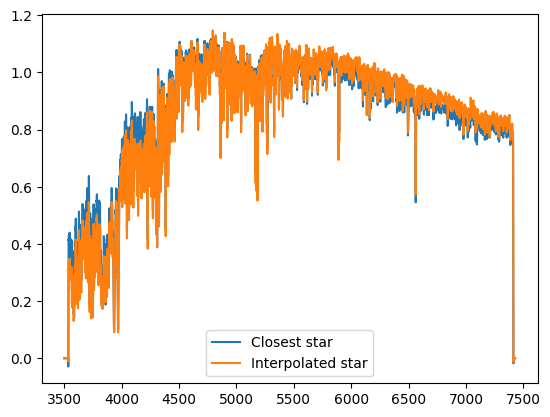

In [7]:
tmp1 = lib.search_by_params(teff=5000.0, logg=3.0, FeH=0.0, MgFe=0.0)
tmp2 = lib.get_spectrum_by_params_delaunay(teff=5000.0, logg=3.0, FeH=0.0, MgFe=0.0)
plt.plot(tmp1.wave, tmp1.spec, label="Closest star")
plt.plot(tmp2.wave, tmp2.spec, label="Interpolated star")
plt.legend()
plt.show()